## PCA en Scikit-learn - Análisis de Componentes Principales (con ejemplo en Python)

In [1]:
import pandas as pd 
from sklearn import datasets
 
iris = datasets.load_breast_cancer()
target_names = {0:'malign',1:'beningn'}
 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
 
df['target'] = iris.target
df['target_names'] = df['target'].map(target_names)

In [2]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malign


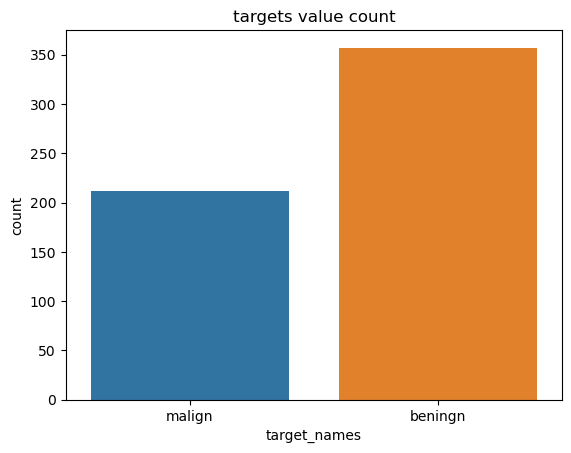

In [3]:
# Las 3 especies de flores tienen 50 registros cada una.
import matplotlib.pyplot as plt
import seaborn as sns 
 
sns.countplot(x='target_names', data=df)
plt.title('targets value count')
plt.show()

## Cargar características y objetivo por separado
Para comprender el conjunto de datos Iris, lo hemos cargado en un marco de datos. Sin embargo, para hacerlo más utilizable para Scikit-learn, cargaremos las características y los objetivos como matrices almacenadas en sus respectivas variables X e y.

In [4]:
X = iris.data
y = iris.target

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preprocesamiento de datos
Vamos a realizar un preprocesamiento de datos muy básico y escalar los datos utilizando StandardScaler.

StandardScaler estandarizará las características mediante la eliminación de la media y el escalado a la unidad de varianza de modo que cada característica tiene μ = 0 y σ = 1.

Convirtiendo esto:

In [6]:
from sklearn.preprocessing import StandardScaler
# data scaling
x_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [7]:
#El argumento n_componentes definirá el número de componentes a los que queremos reducir las características.
# Con el código anterior, se puede ver que aplicar PCA no afectó al número de filas, pero sí al número de columnas, quedando sólo 3 en lugar de 4.

from sklearn.decomposition import PCA
 
pca = PCA(n_components=7)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

Shape before PCA:  (569, 30)
Shape after PCA:  (569, 7)


## Asignar objetivos a componentes principales
Prepararemos el marco de datos PCA para su visualización asignando los nombres de los objetivos a las características PCA.

In [8]:
target_names = {0:'malign',1:'benign'}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,9.192837,1.948583,-1.123166,3.633732,-1.195110,1.411428,2.159398,malign
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655,0.013341,malign
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541457,-0.668160,malign
3,7.122953,10.275589,-3.232790,0.152548,-2.960877,3.053428,1.429929,malign
4,3.935302,-1.948072,1.389767,2.940638,0.546746,-1.226501,-0.936219,malign
...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177315,-0.074824,-2.375190,-0.596127,malign
565,3.793382,-3.584048,2.088476,-2.506027,-0.510722,-0.246705,-0.716314,malign
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534449,-0.192767,malign
567,10.374794,1.672010,-1.877029,-2.356032,-0.033743,0.567931,0.223080,malign


## ¿En qué medida influye cada característica en la predicción?
La varianza explicada, o valor propio, en el ACP muestra la varianza que puede atribuirse a cada uno de los componentes principales.

Es una matriz de valores donde cada valor es igual a la varianza de cada componente principal y la longitud de la matriz es igual al número de componentes definidos con `n_componentes`.

Se puede acceder con la notación `explained_variance_`.

In [9]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888])

## Trazar la varianza explicada
Podemos trazar la varianza explicada para ver la varianza de cada componente principal.

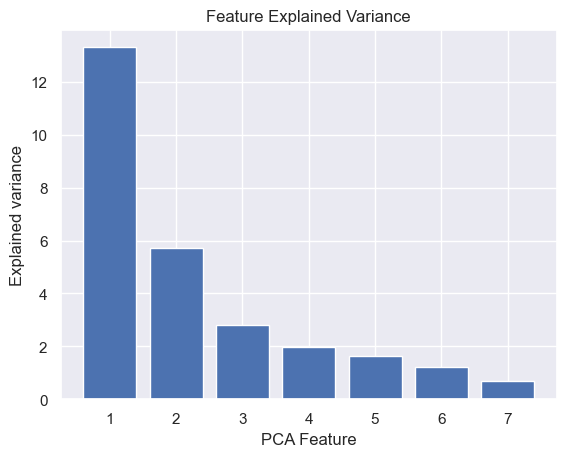

In [10]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=7)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

El gráfico de salida muestra que no necesitamos 3 características, sino sólo 2. La varianza de las 3 características obviamente no es muy significativa.


## Gráfico Scree
Un gráfico scree no es más que un gráfico de los valores propios (también conocidos como la varianza explicada). Básicamente, proporciona la misma información que el gráfico anterior.

La suma acumulada de la varianza explicada puede ayudar a realizar pruebas de codo para identificar componentes principales de baja varianza.

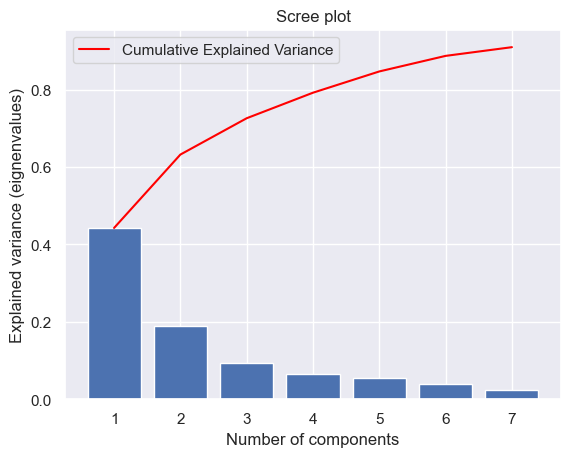

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=7)
 
# Fit and transform data
reduced_features = pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

## Comprender la varianza visualmente
Puede que la varianza le resulte confusa.

Veamos un ejemplo representando nuestras características seleccionadas en un gráfico 3D.

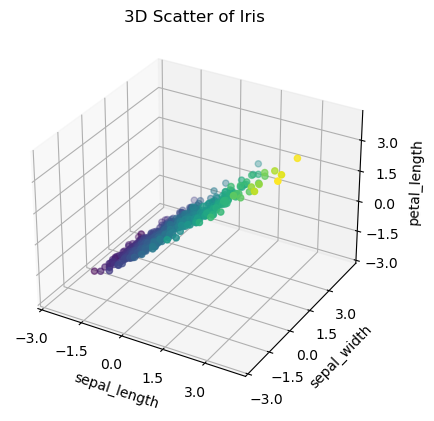

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Iris')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=50)
plt.show()

Al trazar un gráfico en 3D, queda más claro que hay menos varianza en la longitud de los pétalos de las flores del Iris que en la longitud o la anchura de los sépalos, lo que hace casi un panel 2D plano dentro del gráfico en 3D. Eso demuestra que la dimensión intrínseca de los datos es esencialmente de 2 dimensiones en lugar de 4.

Reducir estas 3 características a 2 no sólo haría el modelo más rápido sino que las visualizaciones serían más informativas sin perder demasiada información.

## Trazar el gráfico PCA 2D
Ahora que sabemos que sólo necesitamos 2 componentes principales, repetiremos todos los pasos que hicimos antes usando n_componentes=2.

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
 
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(x_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,9.192837,1.948583,setosa
1,2.387802,-3.768172,setosa
2,5.733896,-1.075174,setosa
3,7.122953,10.275589,setosa
4,3.935302,-1.948072,setosa


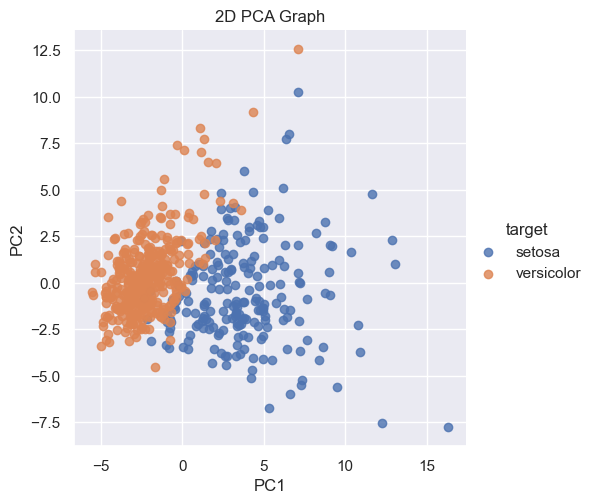

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

# ¿Cómo hacer Biplots 2D?
Los Biplots son gráficos que muestran los diagramas de dispersión PCA a escala además, los gráficos de carga vectores que muestran la influencia de cada característica sobre el componente principal.

## Gráficos de carga
El gráfico de carga muestra los vectores que parten del origen de las cargas de cada característica.

Las cargas (o pesos) son los coeficientes de correlación entre las características originales y los componentes principales.

Representan los elementos del vector propio.

Las cargas al cuadrado de los componentes principales son siempre iguales a 1.

Se puede acceder a las cargas mediante pca.components_.

Inspirado por Renesh Bedre, voy a crear un gráfico de carga para ayudar a entender lo que son.

En primer lugar, trazamos los coeficientes de correlación de cada característica / componente principal.

## Crear marco de datos de coeficientes de correlación
Para entender cómo cada característica afecta a cada componente principal (PC), vamos a mostrar la correlación entre las características y los componentes principales creados con PCA.

In [15]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = iris.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

/home/neno/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
feature_names,,
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349


# Cómo hacer un gráfico de carga 2D
El gráfico de carga ayuda a comprender qué características influyen en cada componente principal y en qué medida.

En primer lugar, trazamos los coeficientes de correlación (cargas) de cada característica.

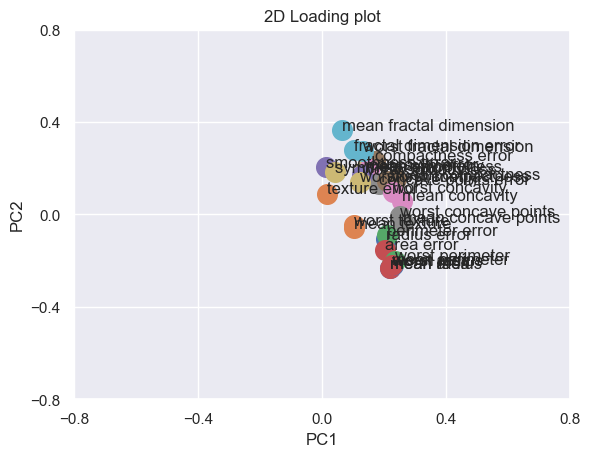

In [16]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

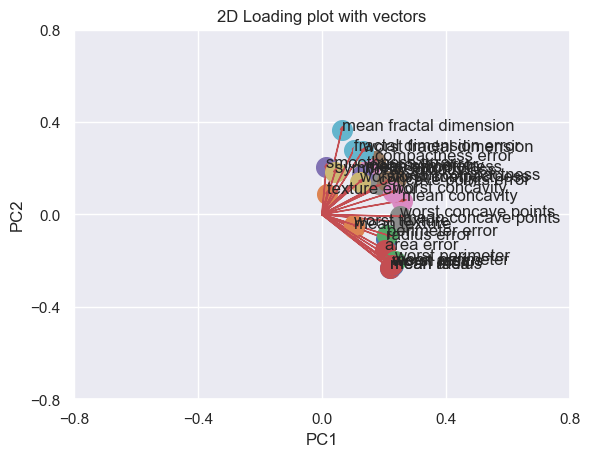

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()


## Escalar los datos del PCA
Volveremos a escalar el gráfico PCA para compararlo con los gráficos de carga.

He tomado prestado parte del código del fantástico tutorial de Prasad Ostwal sobre PCA.

In [18]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2,target
0,0.420053,0.095758,setosa
1,0.109107,-0.185177,setosa
2,0.262002,-0.052837,setosa
3,0.325472,0.504967,setosa
4,0.179818,-0.095733,setosa
...,...,...,...
564,0.294235,-0.175773,setosa
565,0.173333,-0.176129,setosa
566,0.057399,-0.093483,setosa
567,0.474060,0.082167,setosa


## Combinar el diagrama de dispersión y el diagrama de carga en un diagrama biológico
Utilizando los gráficos de carga y los gráficos de escala, ahora podemos mostrar los coeficientes de correlación contra el gráfico de dispersión PCA en el mismo gráfico.

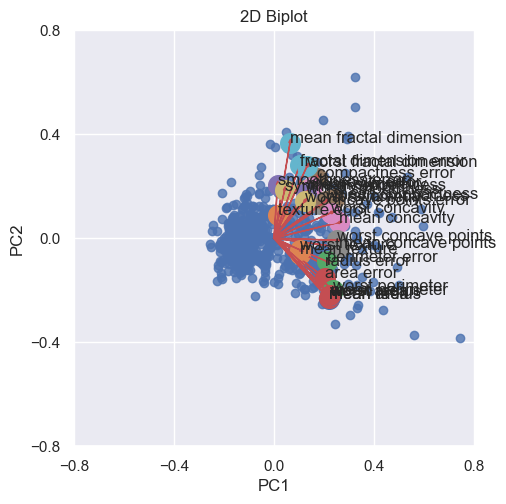

In [19]:
# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()